# Q1


In [1]:
import numpy as np

In [2]:
X0,X1,X2 = 0.1 , 0.5 , 0.2
W0 = 0.4
W1= 0.3
W2=0.6

Threshold = 0.5
X = np.array([X0,X1,X2])
W = np.array([W0,W1,W2])



In [3]:

def perceptron ( X_values,W_values):
    Y = X_values@W_values
    if Y > Threshold:
        print (Y, ', value is Postive' )
    else: 
        print (Y, ', value is Negative')
    


In [4]:
perceptron ( X,W )

0.31 , value is Negative


# Q2


In [5]:
W0_ = 0.2
W1_= 0.9
W2_=0.1
W = np.array([W0_,W1_,W2_])


In [6]:
perceptron ( X,W )

0.49 , value is Negative


# Q4


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data=pd.read_table('perceptron_toydata.txt',sep='	',header=None)
X_data=data.iloc[:,:-1].to_numpy()
Y_data=data.iloc[:,-1].to_numpy()
#importing data and seperating it to X and Y as Y r
Y_data.shape = (-1,)
print (np.shape(X_data))
print (np.shape(Y_data))
np.bincount(Y_data)




(100, 2)
(100,)


array([50, 50], dtype=int64)

In [9]:
# Shuffling data 

shuffle_idx = np.arange(Y_data.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)

X, Y = X_data[shuffle_idx], Y_data[shuffle_idx]





In [10]:
#Train/Test split

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = Y[shuffle_idx[:70]], Y[shuffle_idx[70:]]



In [11]:
# Normalizing data
mu,sigma = X_train.mean(axis=0), X_train.std(axis=0)
def Normalize( X ):
    
    X_norm = (X - mu) / sigma
    
    return X_norm


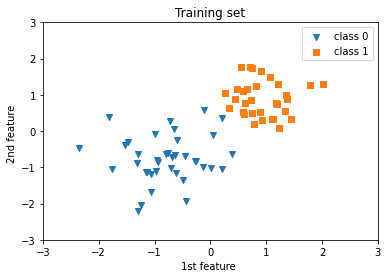

In [12]:
X_train=Normalize( X_train)

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='v')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('1st feature ')
plt.ylabel('2nd feature ')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()




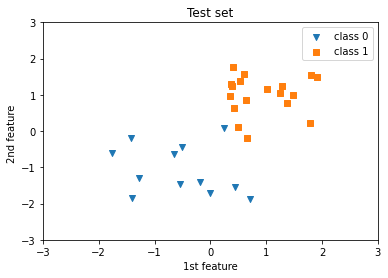

In [13]:
X_test= Normalize(X_test)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='v')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('1st feature')
plt.ylabel('2nd feature ')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()


In [14]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, ), dtype=float)
        self.bias = np.zeros(1, dtype=float)

    def forward(self, x):
        linear = (x@ self.weights) + self.bias # comp. net input
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, periods):
        for e in range(periods):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i])
                self.weights += (errors * x[i])
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [15]:
ppn = Perceptron(num_features=2)




ppn.train(X_train, y_train, periods=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [1.27340847 1.34642288]

  Bias: [-1.]



In [16]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [17]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


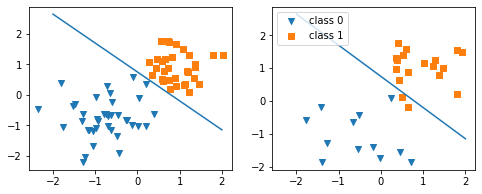

In [18]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='v')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='v')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()